# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>
## <center>Trabajo Práctico 1 : Reservas de Hotel </center>
#### Grupo 29:
* Alen Davies Leccese - 107084
* Luca Lazcano - 107044

## Tabla de contenidos
- [Importación y configuración](#imports-y-configs)
- [Análisis Exploratorio y Preprocesamiento de Datos](#análisis-exploratorio-y-preprocesamiento-de-datos)
     - [Exploración inicial](#exploracion-inicial)
          - [Primera aproximación a los datos](#primera-aproximación-a-los-datos)
          - [Variables cualitativas](#variables-cualitativas)
          - [Variables cuantitativas](#variables-cuantitativas)
          - [Variales irrelevantes para el análisis](#variales-irrelevantes-para-el-análisis)
          - [Análisis gráfico distribución de variables](#análisis-gráfico-distribución-de-variables)
          - [Correlaciones entre variables](#correlaciones-entre-variables)
          - [Relación de variables con el target](#relación-de-variables-con-el-target)
     - [Visualización de datos](#visualización-de-datos)
     - [Datos faltantes](#datos-faltantes)
          - [Análisis](#análisis)
          - [Revisión y decisión](#revisión-y-decisión)
          - [Comparaciones](#comparaciones)
     - [Data Cleaning](#data-cleaning)
          - [Tipos de datos](#tipos-de-datos)
          - [Ingeniería de features](#ingeniería-de-features)
     - [Valores atípicos](#valores-atípicos)
          - [Análisis Univariado](#análisis-univariado)
          - [Análisis Multivariado](#análisis-multivariado)



#### Imports y configs

Importamos las librerias y creamos el dataframe

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('./Datasets/hotels_train.csv')
df.drop(columns=['reservation_status_date'], inplace=True)

hotel = df.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

### **Exploración inicial**

#### Primera aproximación a los datos

Primero vemos cómo están organizados los datos, imprimiendo algunas filas:

In [ ]:
hotel.sample(5)

Vemos que el dataset contiene información sobre las reservas en dos hoteles distintos.

In [ ]:
hotel.hotel.value_counts()

Luego vemos el tipo de dato de cada columna y determinamos a qué tipo de variable corresponde, así sabemos el análisis que se le puede efectuar.

In [29]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

Vemos que hay un mix de variables, cualitativas, ordinales y cuantitativas (discretas y continuas). Se observa que están representadas por varios tipos de datos. Por ejemplo algunas que son de tipo numérico, son cualitativas, como por ejemplo 'agent' y 'company'. El número seguramente representa un índice o id. Otras columnas son "booleanas", el valor numérico representa "verdadero" o "falso". Normalmente un 1 en dicha columna será verdadero, y un 0, falso. Estas columnas son 'is_repeated_guest' e 'is_canceled'.

Vemos si hay duplicados en el dataset:

In [ ]:
print(f'Cantidad de filas duplicadas: {hotel.duplicated().sum()}')

In [ ]:
hotel.head()

#### Variables cualitativas

Para las variables cualitativas se pueden determinar los valores posibles, y a qué corresponden.

In [ ]:
cualitativas = hotel[['hotel','arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'is_canceled', 'agent', 'company']]
cualitativas

La variable 'hotel' puede tomar los siguientes valores:

In [ ]:
hotel['hotel'].value_counts()

La variable 'arrival_date_month' puede tomar los siguientes valores:

In [ ]:
hotel['arrival_date_month'].value_counts()

La variable 'arrival_date_week_number' puede tomar los siguientes valores:

In [ ]:
hotel['arrival_date_week_number'].value_counts().sort_index()

La variable 'meal' puede tomar los siguientes valores:

In [ ]:
hotel['meal'].value_counts().sort_index()

La variable 'country' puede tomar los siguientes valores:

In [ ]:
hotel['country'].value_counts()

La variable 'market_segment' puede tomar los siguientes valores:

In [ ]:
hotel['market_segment'].value_counts()


La variable 'distribution_channel' puede tomar los siguientes valores:

In [ ]:
hotel['distribution_channel'].value_counts()


La variable 'is_repeated_guest' puede tomar los siguientes valores:

In [ ]:
hotel['is_repeated_guest'].value_counts()

La variable 'reserved_room_type' puede tomar los siguientes valores:

In [ ]:
hotel['reserved_room_type'].value_counts().sort_index()

La variable 'assigned_room_type' puede tomar los siguientes valors:

In [ ]:
hotel['assigned_room_type'].value_counts().sort_index()


La variable 'deposit_type' puede tomar los siguientes valores:

In [ ]:
hotel['deposit_type'].value_counts()

La variable 'agent' puede tomar los siguientes valores:

In [ ]:
hotel['agent'].value_counts()

La variable 'company' puede tomar los siguientes valores:

In [ ]:
hotel['company'].value_counts()


La variable 'customer_type' puede tomar los siguientes valores:

In [ ]:
hotel['customer_type'].value_counts()

La variable 'is_canceled' puede tomar los siguientes valores:

In [ ]:
hotel['is_canceled'].value_counts()


#### Variables cuantitativas

Para las variables cuantitativas se pueden calcular las medidas de resumen, "estadísticas", como media, mediana y moda.

In [ ]:
cuantitativas = hotel[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]
cuantitativas.describe()

#### Variables irrelevantes para el análisis

Si bien la variable ``'id'`` no provee ninguna información del contexto y no será analizada ni usada en el entrenamiento del modelo, es necesaria para identificar cada columan a la hora de determinar la precision del modelo. Por esto no la vamos a eliminar del dataset.

Además de esta, es difícil determinar qué variable será irrelevante, antes de haberlas analizado y visto cómo se relacionan entre ellas y con el target 'is_canceled'.

#### Análisis gráfico distribuciones de las variables

Analizamos la distribución de todas las variables, tanto cualitativas como cuantitativas.

##### *Variables cualitativas*

Primero analizamos la distribucion de las variables cualitativas:

In [ ]:
sns.countplot(x='hotel', data=cualitativas)

In [ ]:
sns.countplot(x='customer_type', data=cualitativas)

In [ ]:
sns.countplot(x='deposit_type', data=cualitativas)

In [ ]:
sns.countplot(x='distribution_channel', data=cualitativas)

In [ ]:
sns.countplot(x='market_segment', data=cualitativas)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), size=8)

In [ ]:
sns.countplot(y='country', data=cualitativas, order=cualitativas['country'].value_counts().iloc[:20].index)

In [ ]:
room_types = hotel[['assigned_room_type', 'reserved_room_type']].copy()

room_types_melted = pd.melt(room_types, value_vars=[
                    'reserved_room_type', 'assigned_room_type'])

sns.histplot(data=room_types_melted, x='value',
             hue='variable', binwidth=1, multiple='dodge')

In [ ]:
sns.countplot(x='is_repeated_guest', data=cualitativas)

In [ ]:
sns.countplot(x='meal', data=cualitativas)

In [ ]:
sns.countplot(x='is_canceled', data=cualitativas)

##### *Variables cuantitativas*

Ahora vemos la distribucion de las variables cuantitativas

In [ ]:
sns.histplot(hotel['lead_time'], bins=30)

In [ ]:
sns.countplot(x='arrival_date_year', data = cuantitativas, palette='coolwarm')

In [ ]:
sns.countplot(x='arrival_date_day_of_month', data = cuantitativas, palette='coolwarm')
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), size=8)

In [ ]:
sns.countplot(x='stays_in_weekend_nights', data = cuantitativas, palette='coolwarm')

In [ ]:
sns.countplot(x='stays_in_week_nights', data = cuantitativas, palette='coolwarm')

In [ ]:
sns.countplot(x='adults', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.countplot(x='children', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.countplot(x='babies', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.countplot(x='is_repeated_guest', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.countplot(x='previous_cancellations', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.histplot(x='previous_bookings_not_canceled', data=cuantitativas)

In [ ]:
sns.countplot(x='booking_changes', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.histplot(x='days_in_waiting_list', data=cuantitativas)

In [ ]:
sns.histplot(x='adr', data=cuantitativas, palette = 'coolwarm', bins=30)

In [ ]:
sns.countplot(x='required_car_parking_spaces', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.countplot(x='total_of_special_requests', data=cuantitativas, palette = 'coolwarm')

#### Correlaciones entre variables

Calculamos la matriz de correlaciones para ver las correlaciones entre las variables del dataset.

In [ ]:
matriz_corr = hotel.corr()
matriz_corr

Podemos graficar las correlaciones en un heatmap para que sea mas simple de ver

In [ ]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(data = matriz_corr, annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlacion entre las variables', fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

No hay variables que tengan una correlacion demasiado alta, es decir, muy cercana a 1. Esto es bueno, ya que no hay variables que esten muy correlacionadas entre si.
Igualmente veremos mas de cerca aquellas variables que tengan un poco de correlacion. 

Las correlaciones con el target 'is_canceled' se analizan más adelante.

Vamos a considerar las correlaciones mayores a 0.3:
- `'stays_in_weekend_nights'` y `'stays_in_week_nights'`
- `'previous_bookings_not_canceled'` y `'is_repeated_guest'`
- `'children'` y `'adr'`

In [ ]:
sns.regplot(x=hotel['stays_in_week_nights'], y=hotel['stays_in_weekend_nights'], line_kws={'color':'red'}).set(xlabel='Noches de semana', ylabel='Noches de fin de semana', title='Noches de semana vs. Noches de fin de semana')
plt.show()

Vemos que poseen una correlacion positiva como también habíamos visto en la matriz de correlaciones.

In [ ]:
sns.regplot(x=hotel['adr'], y= hotel['children'], line_kws={'color':'red'}).set(xlabel='Tarifas', ylabel='Cantidad de Niños', title= 'Cantidad de niños vs Tarifas')
plt.show()

También poseen una correlacion positiva.

In [ ]:
sns.barplot(x=hotel['is_repeated_guest'], y=hotel['previous_bookings_not_canceled'],data=hotel, palette ='Blues').set(xlabel='Es cliente repetido', ylabel='Reservas no canceladas previamente', title= 'Reservas no canceladas previamente vs. Es cliente repetido') 
plt.show()

También podemos ver que hay una correlacion entre estas dos variables ya que las barras tienen una diferencia de altura significativa.

#### Relación de variables con el target

In [ ]:
plt.title("Porcentaje de reservas por estado de la reserva", fontsize = 20, pad = 10)
sns.barplot(x=hotel['is_canceled'].unique(), y=hotel['is_canceled'].value_counts(normalize=True), palette='Blues')
plt.xlabel("Estado de la reserva", fontsize = 12, labelpad = 5)
plt.ylabel("Porcentaje de reservas", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['No Cancelada', 'Cancelada'])

Podemos ver que aproximadamente el 50% de las reservas fueron canceladas.

Ahora me quedo solo con las correlaciones entre las variables y nuestro target ``'is_canceled'``

In [ ]:
correlacion = hotel.corr()
correlacion['is_canceled'].sort_values(ascending=False).reset_index()

Las grafico también en un heatmap para verlas con mayor claridad

In [ ]:
fig = plt.figure(figsize=(5,8))
ax = sns.heatmap(correlacion[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, cmap='coolwarm')
ax.set_title('Correlacion entre las variables y el target', fontsize=12)

- ``'lead_time'`` es la variable que más está correlacionada con ``'is_canceled'``, nuestro target. Tiene sentido que a medida que pasan los días entre que se realiza la reserva y la fecha de llegada, los clientes tienen más tiempo para cancelar la reserva y hay más tiempo para que surja un imprevisto.
- La segunda variable con mayor correlacion con nuestro target es ``'total_of_special_requests'``. Esto podría pensarse como que el hotel tiene en cuenta las necesidades de los clientes y esto podría hacer que el cliente sea menos propenso a cancelar su reserva.
- ``'required_car_parking_spaces'`` es la tercera variable con mayor correlacion con nuestro target. Parecido a lo que ocurre con ``'total_of_special_requests'``, es lógico que si el cliente se compromente con el hotel (pidiendo un espacio de estacionamiento), será menos probable que cancele su reserva.
- El historial de un cliente con el hotel (``'previous_bookings_not_canceled'`` o ``'is_repeated_guest'``) no parece estar muy relacionado con la cancelación de la reserva. Pero, que un cliente ya haya cancelado reservas en el hotel si está más relacionado con la cancelación de la reserva.

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Tiempo de anticipacion medio vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['lead_time'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Tiempo de anticipacion (días)", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Las reservas canceladas tienen un tiempo de anticipacion medio más largo.

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Cantidad media de solicitudes especiales vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['total_of_special_requests'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Solicitudes especiales", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Los clientes que cancelan sus reservas hacen menos peticiones especiales.

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Cantidad media de lugares de estacionamiento solicitados vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['required_car_parking_spaces'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Lugares de estacionamiento solicitados", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Los clientes que no cancelan sus reservas tienden a solicitar más lugares de estacionamiento.

In [ ]:
plt.figure(figsize=(10,5)) 
plt.title("Porcentaje de reservas canceladas por tipo de habitacion reservada", fontsize = 20, pad = 10)
sns.barplot(x=hotel['reserved_room_type'], y=hotel['is_canceled'], palette='coolwarm')
plt.xlabel("Tipo de habitación", fontsize = 12)
plt.ylabel("Porcentaje de reservas canceladas", fontsize = 12);

Los clientes que reservaron los tipos de habitación P y L tienen el mayor porcentaje de cancelación de reservas, con un 100% de reservas canceladas.

In [ ]:
plt.figure(figsize=(10,5)) 
plt.title("Porcentaje de reservas canceladas por tipo de depósito", fontsize = 20, pad = 10)
sns.barplot(x=hotel['deposit_type'], y=hotel['is_canceled'], palette='coolwarm')
plt.xlabel("Tipo de depósito", fontsize = 12)
plt.ylabel("Porcentaje de reservas canceladas", fontsize = 12);

Los clientes que pagan un depósito no reembolsable tienen un porcentaje mucho mayor de reservas canceladas.

In [ ]:
sns.countplot(x='customer_type', data=hotel, hue='is_canceled', palette='coolwarm')

In [ ]:
pd.crosstab(hotel['customer_type'], hotel['is_canceled']).apply(lambda x: x/x.sum(), axis=1).sort_values(by=1, ascending=False)

Podemos ver que el tipo de cliente que más cancela sus reservas es el cliente Transient-Party, seguido por el Transient y el Contract. El Group es el que menos cancela sus reservas.

In [ ]:
sns.countplot(x='is_repeated_guest', data=hotel, hue='is_canceled', palette='coolwarm')

In [ ]:
pd.crosstab(hotel['is_repeated_guest'], hotel['is_canceled']).apply(lambda x: x/x.sum(), axis=1).sort_values(by=1, ascending=False)

Podemos ver que si un cliente ya ha reservado en el hotel, es menos probable que cancele su reserva y si no ha reservado en el hotel, es más probable que cancele su reserva.

### **Visualización de los datos**

En esta sección exploraremos los datos visualmente, para encontrar relaciones entre variables.

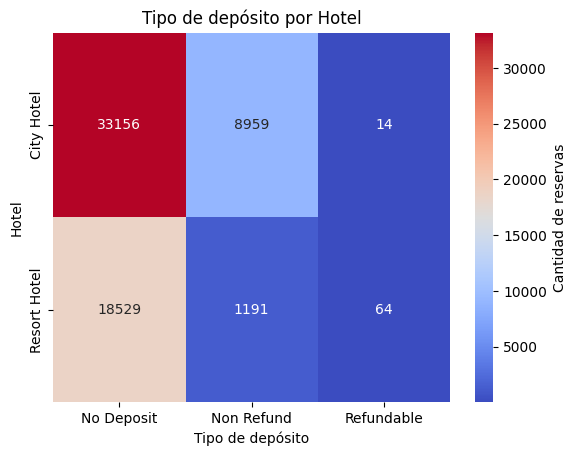

In [44]:
sns.heatmap(pd.crosstab(hotel['hotel'], hotel['deposit_type']), annot=True, fmt='d', cmap='coolwarm').set(xlabel='Tipo de depósito', ylabel='Hotel', title='Tipo de depósito por Hotel')
plt.gca().collections[0].colorbar.set_label('Cantidad de reservas')
plt.show()

Podemos ver que en ambos hoteles, la mayoria de las reservas son sin depósito y luego le siguen las reservas con un depósito sin reembolso. Muy pocas reservas en ambos hoteles tienen un depósito reembolsable.

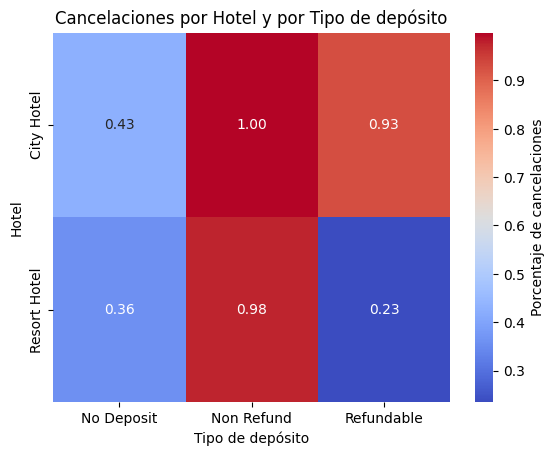

In [43]:
pivot = hotel.pivot_table(index='hotel', columns='deposit_type', values='is_canceled')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.2f').set(xlabel='Tipo de depósito', ylabel='Hotel', title='Cancelaciones por Hotel y por Tipo de depósito')
plt.gca().collections[0].colorbar.set_label('Porcentaje de cancelaciones')
plt.show()

En ambos hoteles, las reservas realizadas con un depósito sin reembolso son las más canceladas mientras que las reservas realizadas sin depósito son mucho menos canceladas.


También se puede ver que en el City Hotel las reservas con un depósito reembolsable son bastante canceladas.

En el Resort Hotel, las reservas con un depósito reembolsable son las menos canceladas.

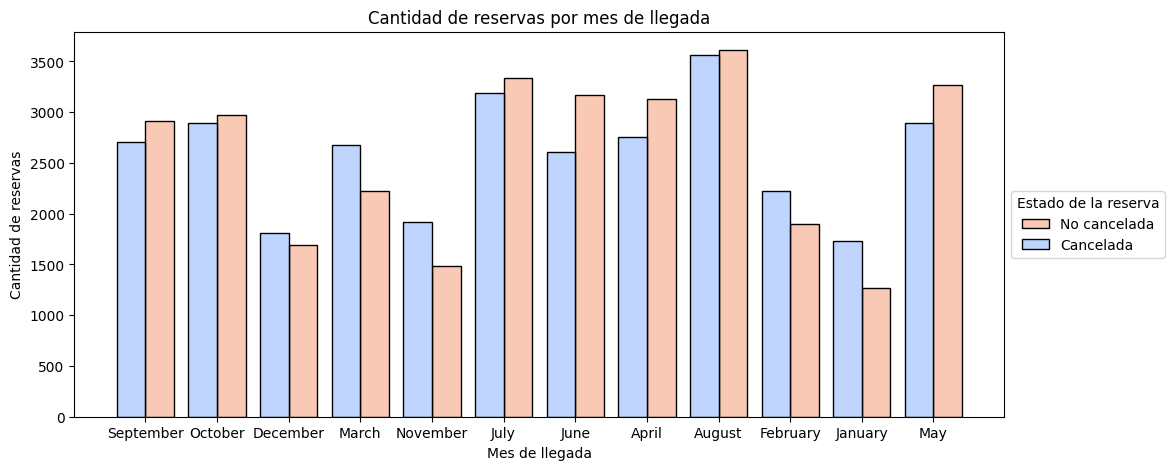

In [54]:
plt.figure(figsize=(12,5))
sns.histplot(x='arrival_date_month', data=hotel, hue='is_canceled', palette='coolwarm', multiple='dodge', shrink=.8).set(xlabel='Mes de llegada', ylabel='Cantidad de reservas', title='Cantidad de reservas por mes de llegada')
plt.gca().legend(['No cancelada', 'Cancelada'], loc='center left', bbox_to_anchor=(1, 0.5), title='Estado de la reserva')
plt.show()


Los meses Agosto y Julio son los meses con más reservas.

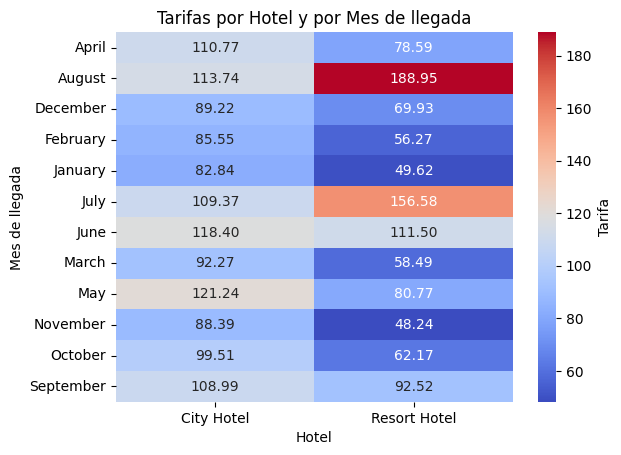

In [45]:
pivot = hotel.pivot_table(index='arrival_date_month', columns='hotel', values='adr')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.2f').set(xlabel='Hotel', ylabel='Mes de llegada', title='Tarifas por Hotel y por Mes de llegada')
plt.gca().collections[0].colorbar.set_label('Tarifa')
plt.show()

En el City Hotel, el mes con una tarifa promedio mas alta es Mayo, seguida Junio y Agosto. En el Resort Hotel, el mes con una tarifa promedio mas alta es Agosto, seguida por Julio y Junio.

Los meses más baratos para reservar en el City Hotel son Febrero, Enero y Noviembre. En el Resort Hotel, los meses más baratos para reservar son Noviembre, Diciembre y Enero.

In [55]:
hotel.groupby('hotel')['adr'].mean()

hotel
City Hotel      104.858110
Resort Hotel     97.114802
Name: adr, dtype: float64

En promedio el Resort Hotel tiene una tarifa más baja que el City Hotel.

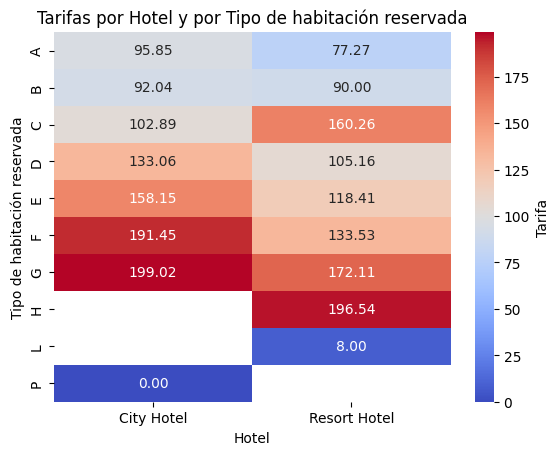

In [40]:
pivot = hotel.pivot_table(index='reserved_room_type', columns='hotel', values='adr')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.2f').set(xlabel='Hotel', ylabel='Tipo de habitación reservada', title='Tarifas por Hotel y por Tipo de habitación reservada')
plt.gca().collections[0].colorbar.set_label('Tarifa')
plt.show()

Las habitaciones con tarifas mas altas en el City Hotel son las habitaciones tipo G, F y E. En el Resort Hotel, las habitaciones con tarifas mas altas son las habitaciones tipo H, G y C.

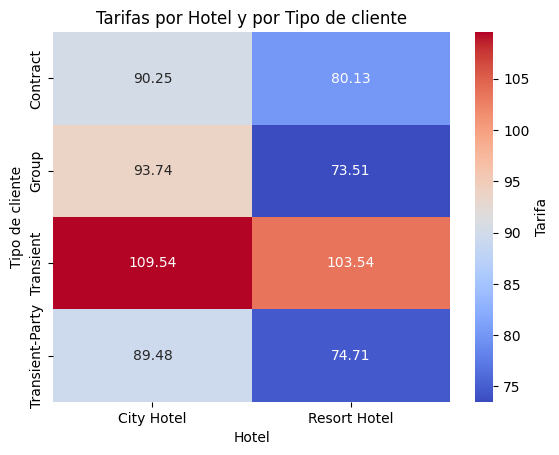

In [46]:
pivot = hotel.pivot_table(index='customer_type', columns='hotel', values='adr')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.2f').set(xlabel='Hotel', ylabel='Tipo de cliente', title='Tarifas por Hotel y por Tipo de cliente')
plt.gca().collections[0].colorbar.set_label('Tarifa')
plt.show()

Los clientes Transient son los que pagan tarifas más altas en ambos hoteles. Los que pagan tarifas más bajas son los clientes Group en el caso de Resort Hotel y los clientes Transient-Party en el caso de City Hotel.

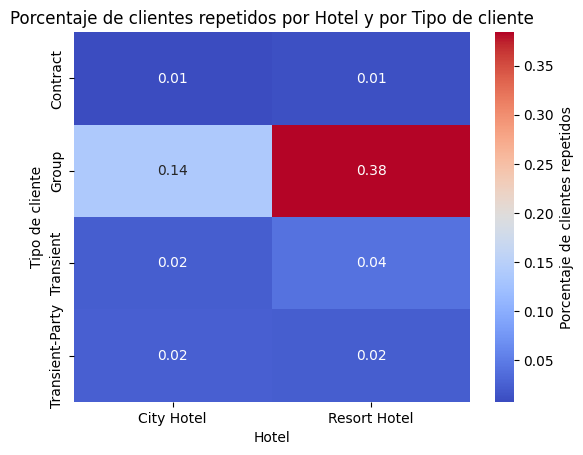

In [47]:
pivot = hotel.pivot_table(index='customer_type', columns='hotel', values='is_repeated_guest')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.2f').set(xlabel='Hotel', ylabel='Tipo de cliente', title='Porcentaje de clientes repetidos por Hotel y por Tipo de cliente')
plt.gca().collections[0].colorbar.set_label('Porcentaje de clientes repetidos')
plt.show()

Los clientes de tipo Group son el tipo de cliente que más repite hotel al realizar sus reservas mientras que los clientes de tipo Contract son los que menos repiten hotel al realizar sus reservas.

In [60]:
hotel.groupby('hotel')['is_repeated_guest'].mean()

hotel
City Hotel      0.023072
Resort Hotel    0.038465
Name: is_repeated_guest, dtype: float64

También podemos ver que el Resort Hotel tiene un mayor porcentaje de clientes repetidos.

### **Datos faltantes**

Como los modelos de ML no pueden trabajar con datos faltantes, debemos tratarlos de alguna forma.

#### Análisis

Obtengo una tabla con la cantidad y el porcentaje de nulos por columna:

In [ ]:

# Obtengo una serie con la suma de nulos por columna.
cols_null = hotel.isna().sum()

# Filtro las columnas para quedarme solo con las que tienen nulos.
# Luego, reseteo el índice y renombro las columnas.
cols_null = cols_null[cols_null > 0].reset_index().rename(
    columns={'index': 'Columna', 0: 'Cant. nulos'})

# Ordeno las columnas por cantidad de nulos.
cols_null = cols_null.sort_values(
    by='Cant. nulos', ascending=False)

# Agrego una columna con el porcentaje de nulos respecto a la cantidad total de datos.
cols_null['% nulos'] = (cols_null['Cant. nulos'] /
                        hotel.shape[0] * 100).round(3)

cols_null

Entonces, hay 4 columnas que tienen valores nulos:
- ``children`` tiene 4 valores nulos (0,01%)
- ``country`` tiene 221 valores nulos (0,36%)
- ``agent`` tiene 7890 valores nulos (12,7%)
- ``company`` tiene 58761 valores nulos (94,9%)

Grafico los porcentajes de nulos por columna:

In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'company'])


In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'agent'])


In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'country'])


In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'children'])


Viendo el dataset, vimos que existen múltiples columnas con cantidad 0 de adultos. Si bien esto no es un dato nulo, ya que es una cantidad posible, consideramos anormal que ningún adulto esté presente en una reserva. Por lo tanto, consideramos estos datos como faltantes o mal cargados. Veamos cuántas reservas hay de este tipo:

In [ ]:
hotel.loc[hotel['adults'] == 0].shape[0]

Apenas 197 reservas tienen 0 adultos. Esto representa una cantidad ínfima sobre el total del dataset:

In [ ]:
hotel.loc[hotel['adults'] == 0].shape[0] / hotel.shape[0] * 100

Esto representa un 0,32% del total de las reservas, por lo que eliminamos estos registros sin temor a afectar el modelo.

In [ ]:
hotel = hotel.loc[hotel['adults'] > 0]

#### Revisión y decisión

##### Nulos en ``children``

Según el paper, no deberían existir valores faltantes. Es raro entonces encontrar que 4 observaciones de la columna ``children`` son raros. Por el ínfimo porcentaje que estos representan, podemos simplemente eliminar las filas que tienen este dato faltante, sin mayores consecuencias.

In [ ]:
hotel.dropna(subset=['children'], inplace=True)

In [ ]:
print("Cantidad de registros", hotel.shape[0])

Confirmamos que se eliminaron 4 registros del dataset.

##### Nulos en ``country``

El paper también da información al respecto de los valores faltantes en la columna ``country``:
> It is also common for hotels not to know the correct nationality of the customer until the moment of check-in.

Nos aclaran que es común que los hoteles no conozcan la nacionalidad del cliente hasta el momento del check-in. Por ello, podemos asumir que los valores faltantes en esta columna son válidos, y se pueden imputar por un valor que represente este desconocimiento.

Esto resuelve el problema a fines del análisis de los datos, pero no para el entrenamiento del modelo de ML. Una decisión deberá tomarse respecto a estos datos para evitar un sesgo incorrecto en el entrenamiento del modelo, considerando que nacionalidades conocidas recién al momento del check-in bien pudieron haber sido originalmente registradas como desconocidas.

Este hecho puede influenciar la predicción del modelo de forma negativa, insertando un sesgo incorrecto en el entrenamiento del modelo.

Reemplazamos los valores nulos de la columna ``country`` por el valor 'Desconocido'.

In [ ]:
# Replace null values in 'country' column with 'Unknown'
hotel['country'].fillna('Desconocido', inplace=True)

##### Nulos en ``company`` y ``agent``

En la columna ``company``, el 95% de los registros tienen ``null`` como valor. En principio, nos inclinamos a pensar que este dato casi no fue registrado, o falta para la mayoría de los registros. Pero revisando el paper, nos encontramos con la siguiente aclaración:

> The PMS assured no missing data exists in its database tables. However, in some categorical
variables like Agent or Company, “NULL” is presented as one of the categories. This should not be
considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

En criollo, nos aclaran que ``null`` en esta columna no debería interpretarse como dato faltante, sino como "no aplica". Para las columnas ``company`` y ``agent``, un valor ``null`` debería entenderse como "no reservó a través de compañía/agente".

Ignorar estos datos puede causar que perdamos información que podría resultar útil para entrenar el modelo. ¿Es posible que exista una correlación entre la compañía usada y la cancelación? ¿Entre el agente y cancelación? ¿Y si en realidad lo que importa es el hecho de reservar por agente, compañía o personalmente; y no específicamente a través de cuál?

Es necesario responder estas preguntas para poder tratar correctamente con estos datos. Se nos ocurren dos alternativas:
- Reconvertir las columnas a un dato booleano, que indique si se usó o no agente/compañía.
- Interpretar a los ``null`` como un agente o compañía más.

La primera opción sería la mejor, se acota considerablemente el rango de valores posibles, pero no se pierde toda la información. Si la cantidad de agentes/compañías repetidos es bajísimo (casi todas las reservas se hacen con agentes/compañías distintas), casi no se podría inferir información. Que una vez un agente haya cancelado, puede sentar un mal precedente, pero de ningún modo se deduce que otra reserva realizada por otro agente, también se cancelará. También, si resulta que todos los agentes/compañías cancelan con más o menos la misma frecuencia; sería un indicador de que el dato específico de quién/cuál agente/compañía reserva es indistinto. Estas opciones indican que se puede simplificar a la primera opción sin pérdida de información.

Si, por el contrario, hay algunos agentes/compañías presentes en muchos registros, y se puede deducir algo de ello, quizás no sea conveniente reconvertir las columnas a booleanos. Si un agente reservó 1000 veces, y canceló 999... ya un sustento más fuerte para creer que volverá a cancelar.

Este análisis corresponde a la etapa de ingeniería de *features*. Por ahora, y con el propósito de avanzar con la limpieza de los datos, reemplazaremos los valores por 'Sin agente' y 'Sin compañía', según corresponda.

In [ ]:
hotel['agent'].fillna('Sin agente', inplace=True)

In [ ]:
# Replace null values in 'company' column with 'Sin compania'
hotel['company'].fillna('Sin compania', inplace=True)

Finalmente, verificamos que ya no existan valores nulos en el dataset.

In [ ]:
hotel.isna().sum().sum()

Nuestro dataset parcial ``hotel`` está libre de valores faltantes o nulos.

#### Comparaciones

Una vez eliminados o tratados valores nulos, es necesario volver a examinar la distribución de los datos, para verificar que no hayan sido alterados de forma significativa.

Las columnas modificadas fueron ``country``, ``children``, ``agent`` y ``company``. Veamos cómo se distribuyen ahora.

Por la gran cantidad de países únicos en el dataset, no es posible graficarlos todos. Por ello, graficamos los 15 países con mayor cantidad de registros.

In [ ]:
sns.countplot(x='country', data=hotel, order=hotel['country'].value_counts().iloc[:15].index)

No hay cambios apreciables en la distribución de los datos, porque los valores faltantes eran pocos, y fueron corregidos sin alterar los demás registros.

Ahora la distribución de la columna ``children``:

In [ ]:
sns.countplot(x='children', data=hotel)

La distribución no cambiar. La cantidad de registros eliminados (4) en irrelevante.

Respecto a la columna ``company``, la distribución es la siguiente:

In [ ]:
sns.countplot(x='company', data=hotel, order=hotel['company'].value_counts().iloc[:15].index)

plt.xticks(rotation=90)
plt.show()

En este caso la distribución se altera totalmente. Al tener en cuenta los valores faltantes, el valor "Sin compañía" (que eran los nulos), pasó a estar muy representada.

Respecto a la columna ``agent``, la distribución es la siguiente:

In [ ]:
sns.countplot(x='agent', data=hotel, order=hotel['agent'].value_counts().iloc[:15].index)

plt.xticks(rotation=90)
plt.show()

En este caso también se altera la distribución, vemos que "Sin agente" pasó al segundo puesto, pero el agente "índice 9" sigue en el primer lugar, y son comparables en el orden de magnitud.

Concluimos que los cambios realizados no alteraron la distribución de los datos de forma significativa, pero pusieron un evidencia datos que se encontraban "ocultos" por ser nulos.

### **Data cleaning**

#### Tipos de datos

Verificamos los tipos de datos de las variables del dataset.

In [ ]:
hotel.dtypes

Vemos que hay variables que tienen un tipo de dato inconsistente con su contenido.
- ``children`` debería ser de tipo numérico, no tiene sentido que sea de tipo float.
- ``agent`` y ``company`` deberían ser de tipo numérico, ya que son categóricas, representan a distintos agentes y vendedores.


Realizamos la conversión de tipos de datos.

In [ ]:
hotel['children'] = hotel['children'].astype('int')

hotel['agent'] = hotel['agent'].astype('int')

hotel['company'] = hotel['company'].astype('int')

Revisamos nuevamente los tipos de datos:

In [ ]:
hotel.dtypes

#### Ingeniería de features

En primer lugar, observamos que tenemos tres columnas distintas que representan el año, mes y día de la fecha de llegada de los clientes. Podemos unificarlas en una sola columna, que represente la fecha de llegada.

Combinamos las columnas `'arrival_date_year'`, `'arrival_date_month'`, `'arrival_date_day_of_month'` en una sola columna `'arrival_date'` de tipo datetime, y dropeamos las columnas anteriores.

In [ ]:
hotel['arrival_date'] = pd.to_datetime(hotel['arrival_date_year'].astype(str) + '-' + hotel['arrival_date_month'] + '-' + hotel['arrival_date_day_of_month'].astype(str))

Verificamos que se hayan convertido correctamente:

In [ ]:
hotel.arrival_date

### **Valores atípicos**

#### Análisis univariado

In [ ]:
hotel_cpy = hotel.copy()

##### Outliers univariados en ``'adr'``

Vamos a intentar identificar outliers univariados mediante el análisis de boxplots.

In [ ]:
sns.boxplot(y=hotel.adr)

In [ ]:
hotel.adr.agg(['min','max']).reset_index()

Podemos ver que la variable ``'adr'`` parece tener outliers. Además, vemos que su mínimo es -6.38 y su máximo es 510.

In [ ]:
Q1_adr = np.quantile(hotel.adr,0.25)
Q3_adr = np.quantile(hotel.adr,0.75)

IQR_adr = Q3_adr-Q1_adr

out_inf = Q1_adr-1.5*IQR_adr
out_sup = Q3_adr+1.5*IQR_adr
print('Valores por debajo de', out_inf, 'son outliers moderados inferiores.')
print('Valores por arriba de', out_sup, 'son outlier moderados superiores.')

In [ ]:
out_inf = Q1_adr-3*IQR_adr
out_sup = Q3_adr+3*IQR_adr
print('Valores por debajo de', out_inf, 'son outliers severos inferiores.')
print('Valores por arriba de', out_sup, 'son outlier severos superiores.')

Considerando estos valores y los max y min de ``'adr'``, podemos ver que tiene outliers superiores tanto moderados como severos, pero no se detectan outliers inferiores.

In [ ]:
outliers = hotel[hotel['adr']>294].sort_values(by='adr', ascending=False)
outliers

Ahora probemos calculando el z-score

In [ ]:
media_adr =  np.mean(hotel_cpy.adr)
std_adr = np.std(hotel_cpy.adr)
hotel_cpy['z_adr'] = (hotel_cpy.adr - media_adr)/std_adr

In [ ]:
hotel_cpy[hotel_cpy['z_adr']>3].sort_values(by='z_adr', ascending=False)

In [ ]:
hotel_cpy[hotel_cpy['z_adr']<-3]

In [ ]:
sns.histplot(hotel_cpy.z_adr, bins=10).set(title='Distribución de z-score de la variable "adr"', xlabel='Z-Score adr')

plt.xticks(np.arange(-3, 10, 1))
plt.show()

Concluimos en que se detectan outliers superiores, pero no inferiores.

Teniendo en cuenta el análisis del boxplot y el cálculo del z-score, voy a proceder a eliminar los outliers superiores de ``'adr'`` que posean un z-score mayor a 3.

In [ ]:
hotel.shape

In [ ]:
# eliminar de hotel las filas que tengan z_adr > 3
hotel = hotel[hotel_cpy['z_adr']<=3]
hotel.shape

In [ ]:
hotel[hotel['adr'] <= 0].sort_values(by='adr', ascending=True)

A pesar de que no se detectan outliers inferiores en ``'adr'``, vieos que hay columnas que tienen un adr negativo o cero. Estas filas también las voy a eliminar ya que no tiene sentido una tarifa negativa o cero.

In [ ]:
hotel.drop(hotel.loc[hotel['adr'] <= 0].index, inplace=True)
hotel.shape

##### Outliers univariados en ``'children'``

In [ ]:
sns.boxplot(y=hotel.children)

In [ ]:
hotel.children.agg(['min','max']).reset_index()

In [ ]:
#z-score
media_children =  np.mean(hotel_cpy.children)
std_children = np.std(hotel_cpy.children)
hotel_cpy['z_children'] = (hotel_cpy.children - media_children)/std_children

In [ ]:
hotel_cpy[hotel_cpy['z_children']>3].sort_values(by='z_children', ascending=False)

In [ ]:
hotel_cpy[hotel_cpy['z_children']<3].sort_values(by='z_children', ascending=True)

In [ ]:
sns.histplot(hotel_cpy.z_children, bins=10).set(title='Distribución de z-score de la variable "children"', xlabel='Z-Score niños')

plt.xticks(np.arange(-3, 30, 3))

plt.show()

En esta variable, se detectan muchos outliers que yo no consideraría ya que son valores normales que puede tomar la variable. Por ejemplo, hay reservas que tienen 0 niños o 3 niños que con el cálculo del z-score aparecen como outliers y sin embargo, son valores válidos. 

Hay una sola reserva que tiene 10 niños, esto lo voy a tomar como un valor atípico y voy a eliminar esta fila.

In [ ]:
hotel.shape

In [ ]:
hotel.drop(hotel[hotel['children'] == 10].index, inplace=True)

In [ ]:
hotel.shape

##### Outliers univariados en ``'babies'``

<Axes: ylabel='babies'>

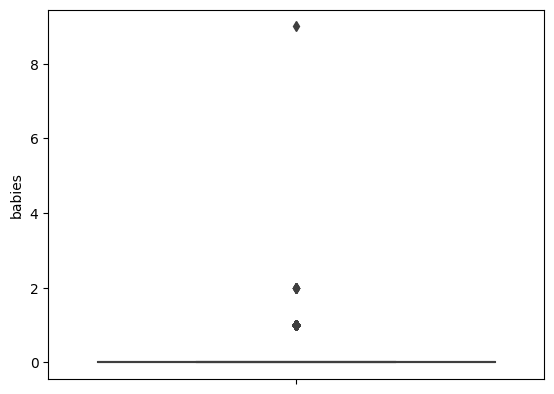

In [59]:
sns.boxplot(y=hotel.babies)

In [ ]:
hotel.babies.agg(['min','max']).reset_index()

In [ ]:
#z-score
media_babies = np.mean(hotel_cpy.babies)
std_babies = np.std(hotel_cpy.babies)
hotel_cpy['z_babies'] = (hotel_cpy.babies - media_babies)/std_babies

In [ ]:
hotel_cpy[hotel_cpy['z_babies']>3].sort_values(by='z_babies', ascending=False)

In [ ]:
hotel_cpy[hotel_cpy['z_babies']<3].sort_values(by='z_babies', ascending=True)

In [ ]:
sns.histplot(hotel_cpy.z_babies, bins=10).set(title='Distribución de z-score de la variable "babies"', xlabel='Z-Score bebes')

plt.xticks(np.arange(-3, 120, 9))

plt.show()

En este caso ocurre algo similar a la variable ``'children'``. Hay reservas que tienen 0 bebés o 3 bebés que con el cálculo del z-score aparecen como outliers y sin embargo, son valores válidos.

In [ ]:
# ver bebes y zscore
hotel_cpy[['babies', 'z_babies']].sort_values(by='z_babies', ascending=False)

Podemos ver que hay una sola reserva con un valor mucho más grande que las demás. Voy a eliminar esta fila ya que lo considero un valor atípico comparado con los demás valores.

In [ ]:
hotel.shape

In [ ]:
hotel.drop(hotel[hotel['babies'] == 9].index, inplace=True)
hotel.shape

##### Outliers univariados en ``'adults'``

In [ ]:
sns.boxplot(y=hotel.adults)

In [ ]:
hotel.adults.agg(['min','max']).reset_index()

In [ ]:
#z-score
media_adults = np.mean(hotel_cpy.adults)
std_adults = np.std(hotel_cpy.adults)
hotel_cpy['z_adults'] = (hotel_cpy.adults - media_adults)/std_adults

In [ ]:
hotel_cpy[hotel_cpy['z_adults']>3].sort_values(by='z_adults', ascending=False)

In [ ]:
hotel_cpy[hotel_cpy['z_adults']<3].sort_values(by='z_adults', ascending=True)

In [ ]:
sns.histplot(hotel_cpy.z_adults, bins=10).set(title='Distribución de z-score de la variable "adults"', xlabel='Z-Score adultos')

plt.xticks(np.arange(-3, 120, 9))

plt.show()

En el caso de la variable ``'adults'`` ocurre algo similar a las variables ``'children'`` y ``'babies'``. Hay reservas que tienen 0 adultos o 2 adultos que con el cálculo del z-score aparecen como outliers y sin embargo, son valores válidos.

In [ ]:
pd.crosstab(hotel_cpy[hotel_cpy['customer_type'] == 'Group']['adults'], hotel_cpy[hotel_cpy['customer_type'] == 'Group']['customer_type'])

In [ ]:
hotel[hotel['adults'] > 4].shape[0]/hotel.shape[0]

Podemos ver que las reservas con mayor cantidad de adultos provienen del tipo de cliente Group, sin embargo estas representan una pequeña porcion de la totalidad de reservas realizadas por groups. Por lo tanto, voy a eliminar las filas con adultos > 4 ya que considero que son valores atípicos.

In [ ]:
hotel.shape

In [ ]:
hotel.drop(hotel[hotel['adults'] > 4].index, inplace=True)
hotel.shape

##### Outliers univariados en ``'previous_cancellations'``

In [ ]:
sns.boxplot(y=hotel.previous_cancellations)

In [ ]:
hotel.previous_cancellations.agg(['min','max']).reset_index()

In [ ]:
#z-score
media_previous_cancellations = np.mean(hotel_cpy.previous_cancellations)
std_previous_cancellations = np.std(hotel_cpy.previous_cancellations)
hotel_cpy['z_previous_cancellations'] = (hotel_cpy.previous_cancellations - media_previous_cancellations)/std_previous_cancellations

In [ ]:
hotel_cpy[hotel_cpy['z_previous_cancellations']>3].sort_values(by='z_previous_cancellations', ascending=False)

In [ ]:
hotel_cpy[hotel_cpy['z_previous_cancellations']<3].sort_values(by='z_previous_cancellations', ascending=True)

In [165]:
hotel.previous_cancellations.value_counts().sort_index().reset_index()

,index,previous_cancellations
0,0,57310
1,1,4135
2,2,60
3,3,34
4,4,16
5,5,9
6,6,12


In [166]:
hotel[hotel['previous_cancellations'] > 6].shape[0]/hotel.shape[0]

0.0

Vemos que si elimino las filas con previous_cancellations > 6, estoy eliminando el 0,002% de las filas. Por lo tanto, voy a eliminar las filas ya que considero que son valores atípicos.

In [ ]:
hotel.shape

In [ ]:
hotel.drop(hotel[hotel['previous_cancellations'] > 6].index, inplace=True)
hotel.shape

##### Outliers univariados en ``'days_in_waiting_list'``

<Axes: ylabel='days_in_waiting_list'>

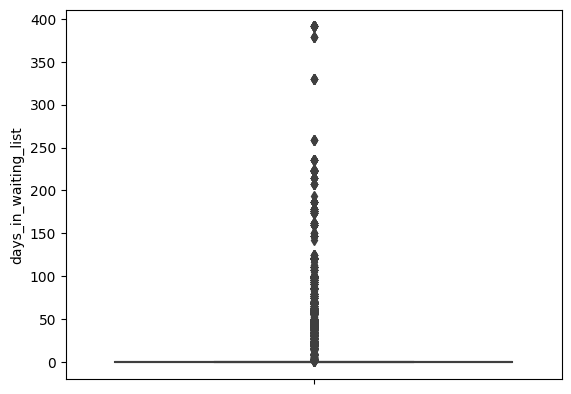

In [160]:
sns.boxplot(y=hotel.days_in_waiting_list)

In [242]:
hotel.days_in_waiting_list.agg(['min','max']).reset_index()

,index,days_in_waiting_list
0,min,0
1,max,193


In [161]:
#z-score
media_days_in_waiting_list = np.mean(hotel_cpy.days_in_waiting_list)
std_days_in_waiting_list = np.std(hotel_cpy.days_in_waiting_list)
hotel_cpy['z_days_in_waiting_list'] = (hotel_cpy.days_in_waiting_list - media_days_in_waiting_list)/std_days_in_waiting_list

In [162]:
hotel_cpy[hotel_cpy['z_days_in_waiting_list']>3].sort_values(by='z_days_in_waiting_list', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adults,z_previous_cancellations,z_days_in_waiting_list
32781,City Hotel,443,2016,October,41,7,0,2,2,0.0,...,391,Transient,65.0,0,0,b533ba99-73c6-4dc7-a5ef-6051d0b7d750,1,0.226159,-0.115646,20.838767
53451,City Hotel,457,2016,October,43,21,0,2,2,0.0,...,391,Transient,65.0,0,0,b6c0c062-2adc-4d8c-8967-eb2d509ba4dd,1,0.226159,-0.115646,20.838767
58325,City Hotel,457,2016,October,43,21,0,2,2,0.0,...,391,Transient,65.0,0,0,c6a045b5-5c66-4873-a911-f4e26261419c,1,0.226159,-0.115646,20.838767
58112,City Hotel,464,2016,October,44,28,0,2,2,0.0,...,391,Transient,65.0,0,0,8a8fc708-c086-4de2-9d14-f5d19dcdf0e4,1,0.226159,-0.115646,20.838767
43322,City Hotel,464,2016,October,44,28,0,2,2,0.0,...,391,Transient,65.0,0,0,25a770b3-f56c-43a7-a47b-c1608ffc9495,1,0.226159,-0.115646,20.838767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7695,City Hotel,65,2015,October,40,2,0,1,1,0.0,...,59,Transient-Party,100.0,0,0,0fa0265b-9971-46de-8627-28e9b4f1d245,0,-1.496469,-0.115646,3.024024
50479,City Hotel,64,2015,October,40,1,2,4,1,0.0,...,59,Transient-Party,100.0,0,0,b34bec36-e940-4bef-9265-3225be5f3d97,0,-1.496469,-0.115646,3.024024
22343,City Hotel,322,2017,June,25,23,2,2,2,0.0,...,59,Transient-Party,105.0,0,3,0e78747c-2da4-4350-b53e-13eaf6882b78,0,0.226159,-0.115646,3.024024
31928,City Hotel,272,2017,June,26,26,1,1,2,0.0,...,59,Transient,115.0,0,0,bf607c45-88f3-42cf-951d-d2ec4cf5b8f7,1,0.226159,-0.115646,3.024024


In [163]:
hotel_cpy[hotel_cpy['z_days_in_waiting_list']<3].sort_values(by='z_days_in_waiting_list', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adults,z_previous_cancellations,z_days_in_waiting_list
46630,City Hotel,72,2015,October,44,28,0,3,2,0.0,...,58,Transient-Party,85.67,0,1,f35633ff-24d2-4814-ab74-d23ceb4e0567,0,0.226159,-0.115646,2.970366
55372,City Hotel,72,2015,October,44,28,0,3,2,0.0,...,58,Transient-Party,85.67,0,0,a7ec3d6f-b35b-40a5-98c6-dc2958a124ac,0,0.226159,-0.115646,2.970366
5215,City Hotel,92,2015,October,41,7,0,4,2,0.0,...,58,Transient-Party,70.00,0,0,83f07ba2-4e2f-4ccb-8387-4f714f28cdc9,0,0.226159,-0.115646,2.970366
34836,City Hotel,72,2015,October,44,28,0,3,2,0.0,...,58,Transient-Party,85.67,0,0,67c43ab8-496c-4ccb-91d4-15da97b5297a,0,0.226159,-0.115646,2.970366
28153,City Hotel,69,2015,October,44,25,2,1,2,0.0,...,58,Transient-Party,85.67,0,0,4af793ff-9fd3-4736-805c-516cd9a8bd09,0,0.226159,-0.115646,2.970366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20813,Resort Hotel,411,2017,May,22,31,2,4,2,0.0,...,0,Transient,71.10,0,0,49a5656a-a840-4727-a8a2-cec161365e1e,1,0.226159,-0.115646,-0.141848
20814,Resort Hotel,211,2016,September,37,7,0,3,1,0.0,...,0,Transient,89.00,0,0,3eff3502-0d0a-4223-9772-44b482eade76,1,-1.496469,-0.115646,-0.141848
20815,Resort Hotel,205,2016,August,35,26,2,4,2,0.0,...,0,Contract,59.80,0,1,49fe23ab-7cd5-4339-96b0-6d97cbc3e593,0,0.226159,-0.115646,-0.141848
20816,City Hotel,4,2017,January,5,31,0,2,1,0.0,...,0,Transient,67.00,1,0,64068d08-6364-4cfe-8235-67ca665eecbf,0,-1.496469,3.903368,-0.141848


In [197]:
hotel.days_in_waiting_list.value_counts().sort_index(ascending=False).reset_index().head(30)

,index,days_in_waiting_list
0,391,33
1,379,5
2,330,7
3,259,5
4,236,16
5,224,9
6,223,33
7,215,12
8,207,8
9,193,1


In [231]:
hotel[hotel['days_in_waiting_list'] == 0].shape[0]/hotel.shape[0]

0.9639632324282188

Vemos que el 93% de los valores de esta variable son 0.

[Text(0.5, 1.0, 'Distribución de la variable "days_in_waiting_list"'),
 Text(0.5, 0, 'Días en lista de espera')]

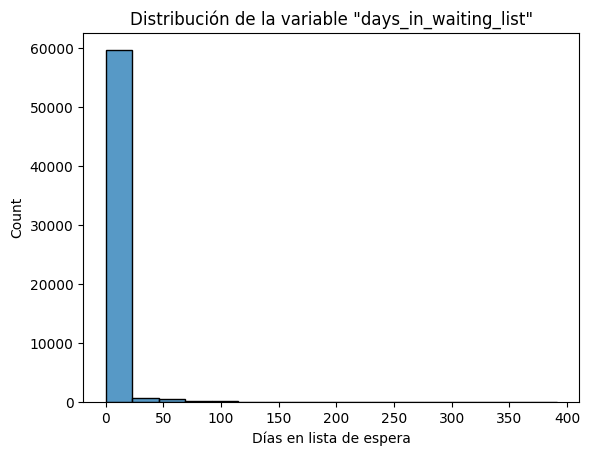

In [227]:
sns.histplot(x=hotel.days_in_waiting_list, data=hotel).set(title='Distribución de la variable "days_in_waiting_list"', xlabel='Días en lista de espera')

In [234]:
hotel[hotel['days_in_waiting_list'] > 200].shape[0]/hotel.shape[0]

0.0020787319734961673

Viendo la distribucion de la variable y teniendo en cuenta todo lo calculado previamente, mi criterio va a ser eliminar las filas que tengan un valor mayor a 200 ya que representa un porcentaje muy bajo 0,002% y los considero valores atípicos.

In [236]:
hotel.shape

(61576, 31)

In [237]:
hotel.drop(hotel[hotel['days_in_waiting_list'] > 200].index, inplace=True)
hotel.shape

(61448, 31)

##### Outliers univariados en ``'lead_time'``

<Axes: ylabel='lead_time'>

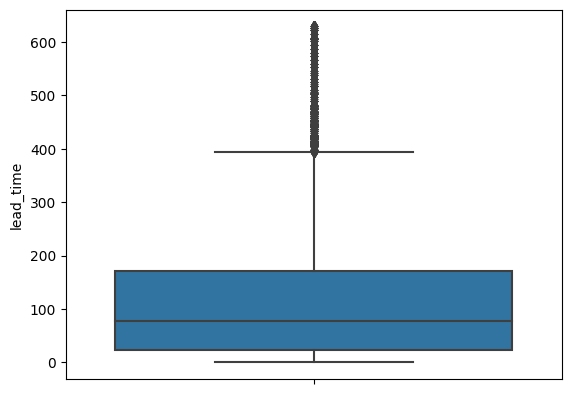

In [202]:
sns.boxplot(y=hotel.lead_time)

In [238]:
hotel.lead_time.agg(['min','max']).reset_index()

,index,lead_time
0,min,0.0
1,max,629.0
2,median,77.0


In [205]:
#Cuartiles
Q1_lead_time=np.quantile(hotel.lead_time,0.25)
Q3_lead_time=np.quantile(hotel.lead_time,0.75)

#Rango intercuartil
IQR_lead_time=Q3_lead_time-Q1_lead_time

#Limite inferior Outliers
out_inf=Q1_lead_time-1.5*IQR_lead_time
out_sup=Q3_lead_time+1.5*IQR_lead_time
print('Valores por debajo de', out_inf, 'son outliers moderados inferiores.')
print('Valores por arriba de', out_sup, 'son outlier moderados superiores.')

Valores por debajo de -199.0 son outliers moderados inferiores.
Valores por arriba de 393.0 son outlier moderados superiores.


In [206]:
out_inf=Q1_lead_time-3*IQR_lead_time
out_sup=Q3_lead_time+3*IQR_lead_time
print('Valores por debajo de', out_inf, 'son outliers moderados inferiores.')
print('Valores por arriba de', out_sup, 'son outlier moderados superiores.')

Valores por debajo de -421.0 son outliers moderados inferiores.
Valores por arriba de 615.0 son outlier moderados superiores.


In [220]:
outliers = hotel[hotel['lead_time']>615].sort_values(by='lead_time', ascending=False)
outliers

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
43359,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Non Refund,1.0,Sin compania,0,Transient,62.0,0,0,1c14ee05-ecec-4fce-8e62-118349fd6630,1
54470,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Non Refund,1.0,Sin compania,0,Transient,62.0,0,0,61f9647d-6302-4e9e-ae70-42f667b98595,1
36325,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Non Refund,1.0,Sin compania,0,Transient,62.0,0,0,885a4ba2-754d-4357-ba2b-89136cdf7b10,1
38903,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Non Refund,1.0,Sin compania,0,Transient,62.0,0,0,9126a85f-339e-4e12-b38f-94e1d42b3a12,1
39760,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Non Refund,1.0,Sin compania,0,Transient,62.0,0,0,8b37b73b-571e-4026-8eee-8a2964fedc59,1
15334,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Non Refund,1.0,Sin compania,0,Transient,62.0,0,0,7340bbcf-9022-40df-b116-677e8044a6ab,1
13740,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Non Refund,1.0,Sin compania,0,Transient,62.0,0,0,dd3f017b-b1c2-4931-b958-6dc6640fa352,1
56524,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Non Refund,1.0,Sin compania,0,Transient,62.0,0,0,41c25a96-bb83-4cea-99df-7982bbbca79d,1
9412,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Non Refund,1.0,Sin compania,0,Transient,62.0,0,0,6dec253c-91e7-423e-9a5b-f53a51763b2e,1
8984,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Non Refund,1.0,Sin compania,0,Transient,62.0,0,0,b0cd1952-9807-4940-9270-0c51248955ff,1


In [209]:
#z-score
media_lead_time = np.mean(hotel_cpy.lead_time)
std_lead_time = np.std(hotel_cpy.lead_time)
hotel_cpy['z_lead_time'] = (hotel_cpy.lead_time - media_lead_time)/std_lead_time

In [213]:
hotel_cpy[hotel_cpy['z_lead_time']>3].sort_values(by='z_lead_time', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adults,z_previous_cancellations,z_days_in_waiting_list,z_lead_time
54470,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Transient,62.0,0,0,61f9647d-6302-4e9e-ae70-42f667b98595,1,0.226159,-0.115646,-0.141848,4.665789
13740,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Transient,62.0,0,0,dd3f017b-b1c2-4931-b958-6dc6640fa352,1,0.226159,-0.115646,-0.141848,4.665789
36325,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Transient,62.0,0,0,885a4ba2-754d-4357-ba2b-89136cdf7b10,1,0.226159,-0.115646,-0.141848,4.665789
60381,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Transient,62.0,0,0,e0fe52b8-0500-4f5e-8fb2-f0184b750747,1,0.226159,-0.115646,-0.141848,4.665789
38903,City Hotel,629,2017,March,13,30,0,2,2,0.0,...,Transient,62.0,0,0,9126a85f-339e-4e12-b38f-94e1d42b3a12,1,0.226159,-0.115646,-0.141848,4.665789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16554,City Hotel,447,2016,September,40,29,0,2,2,0.0,...,Transient,62.0,0,0,f3284453-c4c9-48a3-ba40-8123fc03ec96,1,0.226159,-0.115646,-0.141848,3.022341
38760,City Hotel,447,2016,September,40,29,0,2,2,0.0,...,Transient,62.0,0,0,e8974df5-3e7f-4a97-869f-4fec59d5913a,1,0.226159,-0.115646,-0.141848,3.022341
33858,City Hotel,447,2016,September,40,29,0,2,2,0.0,...,Transient,62.0,0,0,62749c2a-92fe-4605-973d-ac5a26ee662b,1,0.226159,-0.115646,-0.141848,3.022341
24795,City Hotel,447,2016,September,40,29,0,2,2,0.0,...,Transient,62.0,0,0,444a1949-7099-4a2b-8233-cec6c166e9d0,1,0.226159,-0.115646,-0.141848,3.022341


In [215]:
hotel_cpy[hotel_cpy['z_lead_time']<3].sort_values(by='z_lead_time', ascending=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adults,z_previous_cancellations,z_days_in_waiting_list,z_lead_time
51480,Resort Hotel,0,2016,January,5,30,0,1,2,0.0,...,Transient,48.0,0,0,05f31f87-2878-43aa-a812-34b506d1b8fa,0,0.226159,-0.115646,-0.141848,-1.014040
24472,City Hotel,0,2017,March,12,22,0,1,2,0.0,...,Transient,12.0,0,0,c3e227be-a3f7-42be-8754-0f8f643f01dd,1,0.226159,-0.115646,-0.141848,-1.014040
27391,Resort Hotel,0,2015,November,46,9,1,0,1,0.0,...,Transient,35.0,0,0,1beb9892-e026-4926-b7b6-607d6d48f40b,0,-1.496469,-0.115646,-0.141848,-1.014040
17568,Resort Hotel,0,2017,August,34,25,0,1,2,1.0,...,Transient-Party,175.0,0,0,ab1fd859-45cb-48ba-a40e-9bf59914fa10,0,0.226159,-0.115646,-0.141848,-1.014040
48812,City Hotel,0,2017,March,13,29,0,2,2,0.0,...,Transient,108.0,0,0,2e1e5484-fb61-48d3-aa8e-a4141ad2adba,0,0.226159,-0.115646,-0.141848,-1.014040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26072,City Hotel,444,2016,December,49,1,0,3,1,0.0,...,Transient,75.0,0,0,077286a8-eff8-42f3-a289-cc74087c1997,1,-1.496469,0.889107,1.950847,2.995251
40572,City Hotel,444,2016,December,49,1,0,3,1,0.0,...,Transient,75.0,0,0,4a385bd7-a592-46e4-aef0-07218cbce2b2,1,-1.496469,0.889107,1.950847,2.995251
25225,City Hotel,444,2016,December,49,1,0,3,1,0.0,...,Transient,75.0,0,0,4f27f7f4-d892-45ba-94e2-a41721a946c9,1,-1.496469,0.889107,1.950847,2.995251
397,City Hotel,444,2016,December,49,1,0,3,1,0.0,...,Transient,75.0,0,0,73be2364-51b6-44a7-9e73-cb0460cec2e0,1,-1.496469,0.889107,1.950847,2.995251


In [248]:
hotel.lead_time.value_counts().sort_index(ascending=False).reset_index().head(15)

,index,lead_time
0,629,14
1,626,19
2,622,15
3,615,10
4,608,10
5,605,23
6,601,11
7,594,14
8,587,13
9,580,13


In [246]:
hotel[hotel['lead_time'] > 615].shape[0]/hotel.shape[0]

0.0007811482879833355

[Text(0.5, 1.0, 'Distribución de la variable "lead_time"'),
 Text(0.5, 0, 'Lead time')]

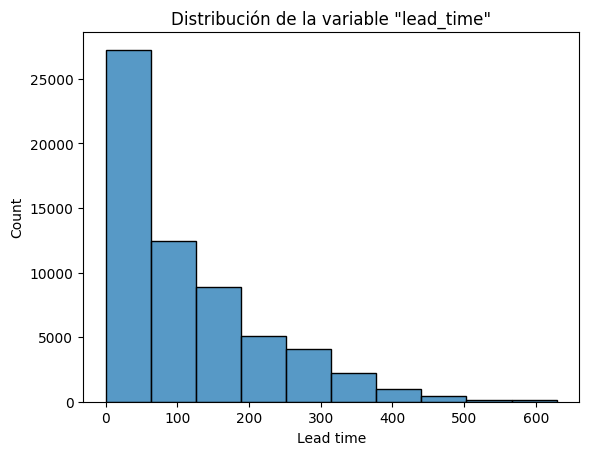

In [219]:
sns.histplot(hotel_cpy.lead_time, bins=10).set(title='Distribución de la variable "lead_time"', xlabel='Lead time')

Teniendo en cuenta lo calculado más arriba, en el análisis del boxplot se detectan outliers severos por encima del valor 615. Viendo también la distribución de la variable y teniendo en cuenta que los valores mayor a 615 representan un porcentaje de 0,007% del total de filas, voy a eliminar las filas que tengan un valor mayor a 615.

In [249]:
hotel.shape

(61448, 31)

In [250]:
hotel.drop(hotel[hotel['lead_time'] > 615].index, inplace=True)
hotel.shape

(61400, 31)

#### Análisis Multivariado